In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy

In [2]:
log_files_path_data = 'Data/'
dfmain = pd.read_csv(log_files_path_data + "OHLC.csv",index_col=False)
dfmain.shape

(2079, 4)

In [5]:
Open = dfmain["Open Price"]
Low = dfmain["Low Price"]
High = dfmain["High Price"]
Close = dfmain["Close Price"]

In [6]:
dfn = pd.read_csv(log_files_path_data + "NLP_20andextra.csv",index_col=0)
dfn.shape

(2079, 24)

In [7]:
dfn.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.179350,1.093155,-1.093298,1.831284,-0.212489,-0.199992,-0.523749,1.132538,0.384131,-0.357564,...,-0.585762,-0.269130,1.044385,-1.012265,-0.155407,1.366740,23,28,0.043574,0.341567
1,0.660418,0.453750,0.298867,1.562769,0.597384,0.985197,0.496383,-0.058332,-0.092421,-0.361294,...,1.268756,-0.034282,-0.381020,0.245287,0.783031,-1.791784,25,35,0.103182,0.393179
2,1.973498,-0.278977,1.192770,0.082261,1.823226,-0.494135,0.082803,-0.661800,0.297644,0.351847,...,-0.331853,-1.917343,1.953617,0.119973,-1.065426,-0.268356,28,40,0.097508,0.400042
3,-0.038314,1.748532,1.321690,0.409203,0.865388,-0.958113,-2.440522,-2.097418,-0.228565,-0.026511,...,-0.033496,1.471607,0.081257,0.207360,0.548547,-0.098573,16,40,0.033077,0.321905
4,0.232499,-1.818002,1.407818,-0.096101,-2.434217,0.128809,0.487804,0.905607,-1.252309,-0.347700,...,0.518922,0.896470,0.908013,1.119629,0.208102,-0.027317,27,39,0.015448,0.450444


In [8]:
dfn[24] = Open
dfn[25] = Low
dfn[26] = High
dfn[27] = Close

In [9]:
dfn.shape

(2079, 28)

In [10]:
df = dfn.copy()

In [11]:
valid_set_size_percentage = 10 
test_set_size_percentage = 10

In [12]:
## Spring 2019
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    scaler = [None] * df.shape[1]
    for i in range(df.shape[1]):
        scaler[i] = min_max_scaler.fit(df.iloc[:,i].values.reshape(-1,1))
        df.iloc[:,i] = scaler[i].transform(df.iloc[:,i].values.reshape(-1,1))          
    return scaler, df

In [13]:
# function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.as_matrix() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len): 
        data.append(data_raw[index: index + seq_len])
    print(len(data[0][0])) ## (len-20)*seq_len* features(include close)
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));  
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_valid = data[train_set_size:train_set_size+valid_set_size,:-1,:]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1,:]
    
    x_test = data[train_set_size+valid_set_size:,:-1,:]
    y_test = data[train_set_size+valid_set_size:,-1,:]
    
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

In [14]:
## Data without normalization
[x_train_ori, y_train_ori, x_valid_ori, y_valid_ori, x_test_ori, y_test_ori] = load_data(df, 20)

28


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# choose one stock
df_stock = df.copy()

cols = list(df_stock.columns.values)
print('df_stock.columns.values = ', cols)

# normalize stock
df_stock_norm = df_stock.copy()
min_max_scaler, df_stock_norm = normalize_data(df_stock_norm)

# create train, test data
seq_len = 20 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
# x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

df_stock.columns.values =  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', 24, 25, 26, 27]
28
x_train.shape =  (1647, 19, 28)
y_train.shape =  (1647, 28)
x_valid.shape =  (206, 19, 28)
y_valid.shape =  (206, 28)
x_test.shape =  (206, 19, 28)
y_test.shape =  (206, 28)


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# - RNNs with basic, LSTM, GRU cells
## Basic Cell RNN in tensorflow

index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
print(perm_array)
np.random.shuffle(perm_array)

[   0    1    2 ... 1644 1645 1646]


In [17]:
# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array   
    start = index_in_epoch
    index_in_epoch += batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size       
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

In [18]:
# Remember to adjust this!!
index_to_begin = 24
index_to_stop = 27

# Remember to adjust this!!
n_inputs = 28

# Remember to adjust this!!
n_outputs = 28


n_steps = seq_len-1 
n_layers = 3  # try 3 and 7 later
n_neurons = 256 # try 256 later
learning_rate = 0.0005
batch_size = 50 # batch size should be 60
n_epochs = 10  # should be 200
dropout_rate = 0.5
forget_bias = 0.1

train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

tf.reset_default_graph()

In [19]:
def lstm_cell(n_neurons):
            return tf.nn.rnn_cell.LSTMCell(n_neurons, state_is_tuple = False)

backward_rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
    [lstm_cell(n_neurons) for _ in range(n_layers)],
    state_is_tuple = False,
)
forward_rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
    [lstm_cell(n_neurons) for _ in range(n_layers)],
    state_is_tuple = False,
)
X = tf.placeholder(tf.float32, (None, n_steps,n_inputs))
y = tf.placeholder(tf.float32, (None, n_outputs))
drop_backward = tf.contrib.rnn.DropoutWrapper(
    backward_rnn_cells, output_keep_prob = forget_bias
)
forward_backward = tf.contrib.rnn.DropoutWrapper(
    forward_rnn_cells, output_keep_prob = forget_bias
)

outputs, last_state = tf.nn.bidirectional_dynamic_rnn(
    forward_backward,
    drop_backward,
    X,
    dtype = tf.float32,
)

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.Bidirectional(keras.layers.RNN(cell))`, which is equivalent to this API
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
outputs = tf.concat(outputs, 2)
logits = tf.layers.dense(outputs, n_outputs)
outputs = tf.reshape(logits, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] 

Instructions for updating:
Use keras.layers.dense instead.


In [21]:
loss = tf.reduce_mean(tf.square(y - outputs)[:,index_to_begin:index_to_stop+1])
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate) 
training_op = optimizer.minimize(loss)

In [22]:
# run graph
with tf.Session() as sess: 
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
       
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch 
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        if iteration % int(train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train}) 
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid}) 
            print('%d epochs: MSE train/valid = %.6f/%.6f'%(
                int(iteration*batch_size/train_set_size), mse_train, mse_valid))

    y_train_pred = sess.run(outputs, feed_dict={X: x_train})
    y_valid_pred = sess.run(outputs, feed_dict={X: x_valid})
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

0 epochs: MSE train/valid = 0.179046/0.632483
0 epochs: MSE train/valid = 0.022928/0.071273
1 epochs: MSE train/valid = 0.017445/0.050168
2 epochs: MSE train/valid = 0.015345/0.047897
3 epochs: MSE train/valid = 0.012317/0.042365
4 epochs: MSE train/valid = 0.010718/0.037272
5 epochs: MSE train/valid = 0.010104/0.034190
6 epochs: MSE train/valid = 0.010006/0.034138
7 epochs: MSE train/valid = 0.008748/0.029072
8 epochs: MSE train/valid = 0.008564/0.026479
9 epochs: MSE train/valid = 0.008248/0.027253


In [23]:
for i in range(y_train.shape[1]):
    y_train[:,i] = min_max_scaler[i].inverse_transform(y_train[:,i].reshape(1,-1))
    y_train_pred[:,i] = min_max_scaler[i].inverse_transform(y_train_pred[:,i].reshape(1,-1))
    y_valid[:,i] = min_max_scaler[i].inverse_transform(y_valid[:,i].reshape(1,-1))
    y_valid_pred[:,i] = min_max_scaler[i].inverse_transform(y_valid_pred[:,i].reshape(1,-1))
    y_test[:,i] = min_max_scaler[i].inverse_transform(y_test[:,i].reshape(1,-1))
    y_test_pred[:,i] = min_max_scaler[i].inverse_transform(y_test_pred[:,i].reshape(1,-1))

correct sign prediction for close - (close-1) price for train/valid/test: 0.50/0.52/0.55


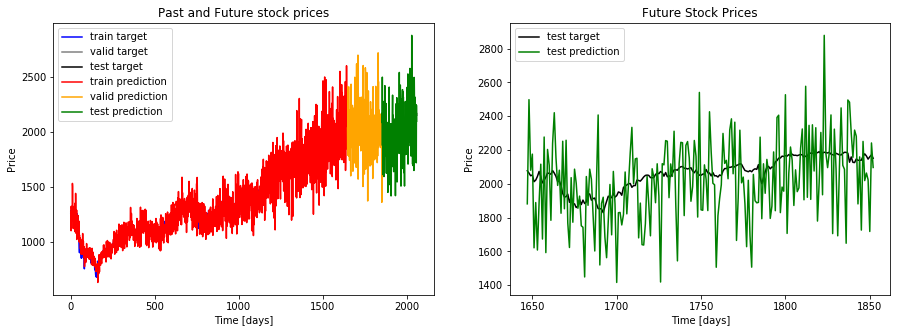

In [24]:
# Remember to change this!!!
ft = 27  # 24=open, 25=high, 26=low, close=27

## show predictions
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);

plt.plot(np.arange(y_train.shape[0]), y_train[:,ft], color='blue', label='train target')

plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:,ft],
         color='gray', label='valid target')

plt.plot(np.arange(y_train.shape[0]+y_valid.shape[0],
                   y_train.shape[0]+y_test.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0]),y_train_pred[:,ft], color='red',
         label='train prediction')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_valid_pred.shape[0]),
         y_valid_pred[:,ft], color='orange', label='valid prediction')

plt.plot(np.arange(y_train_pred.shape[0]+y_valid_pred.shape[0],
                   y_train_pred.shape[0]+y_valid_pred.shape[0]+y_test_pred.shape[0]),
         y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Past and Future stock prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');

plt.subplot(1,2,2);

plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+y_test.shape[0]),
         y_test[:,ft], color='black', label='test target')

plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0]+y_test_pred.shape[0]),
                  y_test_pred[:,ft], color='green', label='test prediction')

plt.title('Future Stock Prices')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best');


#adjust the columns of the variables in order to get the right accuracy prediction. 
sign_correct_train = np.sum(np.equal(np.sign(y_train[1:,ft]-y_train[:len(y_train)-1,ft]),
            np.sign(y_train_pred[1:,ft]-y_train_pred[:len(y_train_pred)-1,ft])).astype(int))
corr_price_development_train = sign_correct_train / y_train.shape[0]

sign_correct_valid = np.sum(np.equal(np.sign(y_valid[1:,ft]-y_valid[:len(y_valid)-1,ft]),
            np.sign(y_valid_pred[1:,ft]-y_valid_pred[:len(y_valid_pred)-1,ft])).astype(int))
corr_price_development_valid = sign_correct_valid / y_valid.shape[0]

sign_correct_test = np.sum(np.equal(np.sign(y_test[1:,ft]-y_test[:len(y_test)-1,ft]),
            np.sign(y_test_pred[1:,ft]-y_test_pred[:len(y_test_pred)-1,ft])).astype(int))
corr_price_development_test = sign_correct_test / y_test.shape[0]

print('correct sign prediction for close - (close-1) price for train/valid/test: %.2f/%.2f/%.2f'%(
    corr_price_development_train, corr_price_development_valid, corr_price_development_test))
plt.show()

In [25]:
#Test the significance level of our correct sign prediction
significance_train = scipy.stats.binom_test(sign_correct_train, n=y_train.shape[0], p=0.50)
significance_valid = scipy.stats.binom_test(sign_correct_valid, n=y_valid.shape[0], p=0.50)
significance_test = scipy.stats.binom_test(sign_correct_test, n=y_test.shape[0], p=0.50)
print(significance_train)
print(significance_valid)
print(significance_test)

0.7674784114729761
0.6258605795002041
0.14324485626489739


In [26]:
#Calculate MAPE
index=27
mape_train = np.mean(abs(np.divide(y_train_pred[:,index],y_train[:,index])))
mape_valid = np.mean(abs(np.divide(y_valid_pred[:,index], y_valid[:,index])))
mape_test = np.mean(abs(np.divide(y_test_pred[:,index], y_test[:,index])))
print('MAPE for train/validation/test set : %.6f/%.6f/%.6f'%(mape_train, mape_valid, mape_test))

MAPE for train/validation/test set : 0.977959/0.980210/0.975666


In [27]:
#Store the actual values and predictions in a dataframe and export

log_files_path_export = 'Data/Output/'
export_pred = np.concatenate([y_train_pred, y_valid_pred, y_test_pred])
export_pred_df = pd.DataFrame(export_pred)
export_pred_df.to_csv(log_files_path_export + 'BLSTM_NLP24.csv')


export_actual =  np.concatenate([y_train, y_valid, y_test])
export_actual_df = pd.DataFrame(export_actual)
export_actual_df.to_csv(log_files_path_export + 'actual_BLSTM_NLP24.csv')